# Using Fiona for File I/O and Spatial Analysis

Fiona is an excellent tool for spatial manipulation. This session show you how to use fiona to read vector data and metadata, use Shapely and Fiona to do spatial analysis, and and write vector data to disk. Shapely and Fiona are essentially wrappers for GEOS and OGR, respectively, which provide clean, Pythonic interfaces for spatial data processing, while still keeping the performance capabilities of the underlying C++ libraries.

Fiona is used for reading and writing vector files (shapefile, GeoPackage, GeoJSON, etc.), while Shapely is used for manipulation and analysis of the geometric objects.

This workshop will cover: 

1. Reading metadata, attributes, and feature geometries of using Fiona
1. Creating spatial objects from longitude and latitude coordinates
1. Reprojecting using pyproj
1. Intersecting point features and polygon features

References:

* Pandas Tutorial, https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python
* Fiona Manual, http://toblerity.org/fiona/manual.html
* Shapely Manual, http://toblerity.org/shapely/manual.html
* AZAVEA Research Blog, Using Shapely and Fiona to Locate High-Risk Traffic Areas, https://www.azavea.com/blog/2016/10/05/philippines-road-safety-using-shapely-fiona-locate-high-risk-traffic-areas/

The input data sources have been converted from shapefile to GeoPackage. In the instructions below, if anything still says shapefile, assume that it just means "vector data file".


## 1. Read the metadata of shapefiles using fiona

In [1]:
import fiona
from fiona.crs import to_string
from shapely.geometry import mapping, shape


census_shp = 'data/philadelphia-census-tract.gpkg'

with fiona.open(census_shp) as nb_lyr:
    driver = nb_lyr.driver # driver of the spatial layer
    schema = nb_lyr.schema  # schema of the spatial layer
    crs = nb_lyr.crs   # coordinate reference system of the spatial layer
    meta = nb_lyr.meta # metadata of the spatial layer
    

Let's look at the metadata:

In [2]:
print (f'The driver is: {driver}\n')
print (f'The schema is: {schema}\n')
print (f'The coordinate reference system is: {crs}\n')
print (f'The metadata is: {meta}')


The driver is: GPKG

The schema is: {'properties': OrderedDict([('STATEFP', 'str'), ('COUNTYFP', 'str'), ('TRACTCE', 'str'), ('GEOID', 'str'), ('NAME_x', 'str'), ('NAMELSAD', 'str'), ('MTFCC', 'str'), ('FUNCSTAT', 'str'), ('ALAND', 'int'), ('AWATER', 'int'), ('INTPTLAT', 'str'), ('INTPTLON', 'str'), ('NAME_y', 'str'), ('GEO_ID', 'str'), ('white_popu', 'str'), ('non-hispan', 'str'), ('black_popu', 'str'), ('asian_popu', 'str'), ('hispanic_p', 'str'), ('total_popu', 'str'), ('median_hou', 'str'), ('per_capita', 'str'), ('built_age', 'str'), ('less_highs', 'str'), ('bachelor', 'str'), ('totaleduca', 'str'), ('male_und18', 'str'), ('female_und', 'str'), ('male65_66', 'str'), ('male67_69', 'str'), ('male70_74', 'str'), ('male75_79', 'str'), ('male80_84', 'str'), ('male85_', 'str'), ('fema_65_66', 'str'), ('fema_67_69', 'str'), ('fema70_74', 'str'), ('fema75_79', 'str'), ('fema80_84', 'str'), ('fema85_', 'str'), ('state', 'str'), ('county', 'str'), ('tract', 'str')]), 'geometry': 'MultiPolyg

Let's print the geometry and attribute of the features in shapefile.

Note that we use a `break` statement to just output four features.

In [3]:
with fiona.open(census_shp) as nb_lyr:
    for i, feat in enumerate(nb_lyr):
        # attribute of the neighborhood features
        attr = feat['properties']
        name = attr['TRACTCE']  #you can find other attribute based on the metadata of the shapefile
        print (f'The neighborhood is: {name}')

        # get the geometry of the polygon feature
        geom = feat['geometry']
        print (f"Geometry: {geom}\n")

        # Limit number of geometries printed
        if i > 4: break


The neighborhood is: 014500
Geometry: {'type': 'MultiPolygon', 'coordinates': [[[(2696627.3147124136, 244448.1200176636), (2696698.9070836296, 244968.8253825209), (2696738.674897288, 245246.60600398478), (2696769.502487294, 245475.65300084336), (2696798.592189442, 245687.52020933514), (2696848.044093481, 246045.76303767413), (2696952.495544389, 246030.98098054755), (2697101.9493675977, 246011.329269212), (2697290.2537621344, 245986.26303894527), (2697440.311348299, 245965.17337954626), (2697566.1603939557, 245947.38000019366), (2697787.433755346, 245916.72925008112), (2697995.7467623292, 245888.24936099595), (2698099.876616488, 245874.920384237), (2698218.9499536534, 245858.75266641527), (2698438.8459338443, 245827.33818014764), (2698376.8147468665, 245269.00682389812), (2698341.8787740185, 244961.116990878), (2698316.8410962285, 244745.3583106844), (2698257.349367031, 244224.27534939174), (2698200.452871065, 243719.66900966756), (2697979.99988346, 243750.3408427744), (2697756.73526583

We can convert the dictionary `geom` variable into a shapely Polygon object using shapely. Here is one example of using shapely to deal with the geometry of features in shapefile. 

MULTIPOLYGON (((2695860.532264817 222663.8013445422, 2695877.836825883 222781.659013631, 2695879.478648173 222792.6404121164, 2695885.009943715 222833.6200626722, 2695900.770966628 222946.6947063278, 2695914.984044665 223036.0353560698, 2695938.223882447 223219.302031295, 2695974.770473381 223494.069448139, 2696038.327457859 223947.8412858844, 2696061.000027223 224112.1406387961, 2696079.524354871 224245.7052412374, 2696100.006812264 224408.1180961542, 2696556.797859631 224342.8268574718, 2697097.452736901 224269.4428994692, 2697255.846316424 224246.042525247, 2697547.1437014 224207.2407924606, 2697989.50456385 224146.288575888, 2698148.449946811 224123.2745565239, 2698218.314973884 224114.0358511006, 2698293.258963064 224103.8537208177, 2698652.462762522 224055.7688426022, 2698592.861303295 223631.260727075, 2698588.66268471 223602.3461535587, 2698524.244082415 223141.2522330336, 2698463.090640748 222683.5347814424, 2698448.992456201 222581.0759524293, 2698394.896462439 222178.9616983

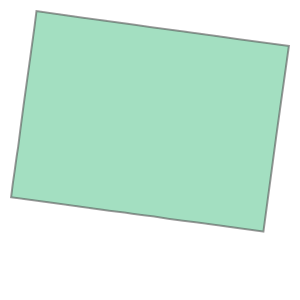

In [4]:
# shape is a function in shapely, imported above with `from shapely.geometry import shape`
print(shape(geom))
shape(geom)

### Buffer a shape

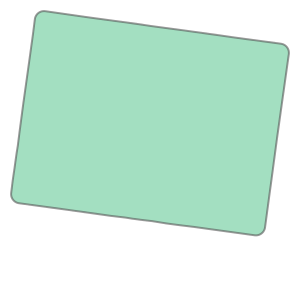

In [5]:
buff_geom = shape(geom).buffer(100)
buff_geom
# mapping(shape(point['geometry']).buffer(5.0))

## 2. Create Geometries from Coordinate Data

Pandas can read and work with tabular data. Like MS Excel, it makes dealing with spreadsheets super easy. Geopandas adds spatial data handling capability, and can convert a Pandas data frame with coordinate columns to a geodataframe. Let get started! 

Reference:

* https://www.tutorialspoint.com/python_pandas/index.htm
* https://pandas.pydata.org/pandas-docs/stable/tutorials.html

### 2.1 Read the CSV file into a Pandas dataframe


In [6]:
import pandas as pd

# read the csv file and create shapefile
coffee_shop_csv = 'data/cambridge_coffee_shops.csv'
coffee_shop_df = pd.read_csv(coffee_shop_csv)


Investigate the table structure by printing the first 5 rows.

In [7]:
coffee_shop_df.head()

,id,name,address,city,state,zip,lat,lon
0,1,1369 Coffee House,1369 Cambridge St,Cambridge,MA,2139,42.373695,-71.100440
1,2,1369 Coffee House,757 Massachusetts Ave,Cambridge,MA,2139,42.366432,-71.105430
2,3,Aceituna Cafe,605 W Kendall St,Cambridge,MA,2142,42.364370,-71.081924
3,4,Al's Deli Cafe-Cambridge,1354 Massachusetts Ave,Cambridge,MA,2138,42.373238,-71.118340
4,5,Algiers Coffee House,40 Brattle St # 3,Cambridge,MA,2138,42.373840,-71.121380


With Geopandas we can easily create a geodataframe (spatial layer) and save it to disk in a variety of vector formats. Here we use the GPKG driver to export to GeoPackage.

Note that we are exporting to the `output` subfolder, in order to keep these data separate from our input data. If you want to rerun this notebook, you can delete anything in the output folder. The `data` folder should be reserved for course data that the professor provides. It can always be redownloaded from the course GitHub repo. The `output` folder listed is in the `.gitignore` for this repo, so any data created there (e.g. during class demo) will not end up on GitHub.

In [8]:
import geopandas as gpd

# crs = {'init': 'epsg:4326'} #http://www.spatialreference.org/ref/epsg/2263/
crs = "EPSG:4326" #http://www.spatialreference.org/ref/epsg/2263/

# create a geodataframe
points_gdf = gpd.GeoDataFrame(coffee_shop_df, crs=crs, \
                geometry=gpd.points_from_xy(coffee_shop_df["lon"], coffee_shop_df["lat"]))

# save the geo-dataframe as a shapefile
points_gdf.to_file("output/cambridge_coffee_shops.gpkg", driver = "GPKG")


C:\Users\tug30201\.conda\envs\geospatial\lib\site-packages\geopandas\array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)
C:\Users\tug30201\.conda\envs\geospatial\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


Now do the same thing using Fiona.

The `mapping` function takes a Shapely geometry and returns a JSON representation that Fiona can understand.

Fiona mimics Python text file I/O. It writes one feature at a time to the target file.

The Pandas `iterrows` method returns a tuple. We assign the first element, which is just an index, to the variable `i`, which we discard. The `row` is then a Pandas named series. We can use the column names `"city"`, `"state"`, `"zip"`, etc., to retrieve the value of each element in the series.


In [9]:
from shapely.geometry import Point, mapping

# prepare the schema and crs of the output shapefile
schema = {
    'geometry': 'Point',
    'properties': {
        'id': 'str: 20',
        'name': 'str: 20',
        'address': 'str: 20',
        'city': 'str: 20',
        'state':'str: 20',
        'zip': 'str: 7'
    }
}

crs = {'init': u'epsg:4326'}

# The output shapefile
coffee_shop_shp = "output/cambridge_coffee_shops2.gpkg"

with fiona.open(coffee_shop_shp, "w", driver = "GPKG", crs = crs, schema=schema) as target:
    for i, row in coffee_shop_df.iterrows():
        lon = row["lon"]
        lat = row["lat"]
        
        id_ = row["id"]
        name = row["name"]
        address = row["address"]
        city = row["city"]
        state = row["state"]
        zipcode = row["zip"]
        
        point = Point(float(lon), float(lat))
        target.write({'properties':{'id': id_,
                                    'name': name,
                                    'address': address,
                                    'city': city,
                                    'state': state,
                                    'zip': zipcode
                                    },
                      'geometry': mapping(point)
                     })
        
print (f"You have successfully exported {coffee_shop_shp}!")


You have successfully exported output/cambridge_coffee_shops2.gpkg!


## 3. Reproject (Transform) a spatial layer

### 3.1. Use pyproj to transform an arbitrary coordinate

We will use pyproj to change the projection of the coffee shop data. First, let's see how this works for a single coordinate point.

Let's say you GPS the location of the Liberty Bell and find that it is at 39.94991585 latitude and -75.1498264359043 longitude. You want to convert that to Pennsylvania State Plane South (EPSG 2272, <https://epsg.io/2272>). The code to transform the coordinates looks like this:

In [10]:
import numpy as np
from pyproj import Transformer, transform

lon = -75.1498264359043
lat = 39.94991585

transformer = Transformer.from_crs(4326, 2272)
print(transformer.transform(lat, lon))

(2697397.2125034714, 235344.06161557176)


### 3.2. Transform all features in a spatial layer to a different coordinate system

The EPSG code of Massachusetts is 6492 (<https://epsg.io/6492>).

The code below shows nested `with` blocks. The outer block reads the source file. The inner block opens the destination file for writing. Then the features in the source file are iterated, transformed (reprojected), and written to the destination one-by-one.

In [11]:
import pyproj
from itertools import repeat
import sys
import time
from pyproj import Transformer

transformer = Transformer.from_crs(4326, 6492)
crs = {'init': 'epsg:6492'}

coffee_shop_shp_reproj = "output/cambridge_coffee_shops2_massproj.gpkg"

# Write the reprojected point features to a GeoPackage
with fiona.open(coffee_shop_shp) as source:
    schema = source.schema
    
    with fiona.open(coffee_shop_shp_reproj, "w", driver=source.driver, crs=crs,schema=schema) as dest:
        for feat in source:
            feat_geom = feat['geometry']
            data = feat['properties']
            coordinates = feat_geom['coordinates']
            print(coordinates)
            
            # Transform the coordinates of every ring.
            reproj_coords = transformer.transform(coordinates[1], coordinates[0])
            
            # copy the geom object, but update the reprojected coordinate
            reproj_geom = feat_geom
            reproj_geom['coordinates'] = reproj_coords
            
            dest.write({'geometry': mapping(shape(reproj_geom)),'properties': data})
            

(-71.10044, 42.373695)
(-71.10543, 42.366432)
(-71.081924, 42.36437)
(-71.11834, 42.373238)
(-71.12138, 42.37384)
(-71.091286, 42.36342)
(-71.08602, 42.36341)
(-71.14083, 42.387756)
(-71.090858, 42.366606)
(-71.12067, 42.37198)
(-71.11313, 42.374096)
(-71.12708, 42.39454)
(-71.1157, 42.371605)
(-71.11851, 42.38885)
(-71.09102, 42.37246)
(-71.099236, 42.36276)
(-71.12187, 42.375237)
(-71.121185, 42.37364)
(-71.11014, 42.36896)
(-71.12072, 42.374268)
(-71.124954, 42.37409)
(-71.1095, 42.374847)
(-71.08831, 42.36659)
(-71.08262, 42.362)
(-71.11892, 42.38863)
(-71.076715, 42.36858)
(-71.093704, 42.372818)
(-71.11141, 42.369423)
(-71.14297, 42.389206)
(-71.094, 42.36653)
(-71.13211, 42.398865)
(-71.07953, 42.37242)
(-71.14183, 42.39465)
(-71.1415, 42.387127)
(-71.12106, 42.37413)
(-71.10325, 42.365105)
(-71.12099, 42.371624)
(-71.11589, 42.36088)
(-71.0942, 42.359676)
(-71.12099, 42.371624)
(-71.10432, 42.370617)
(-71.093605, 42.366386)
(-71.13474, 42.402267)
(-71.114914, 42.37314)
(-71.142

### 3.3 Reproject the traffic accident layer


In [12]:
import time

t0 = time.time()
traffic_accident = "data/crash_data_collision_crash_2007_2017.gpkg"

layer = fiona.open(traffic_accident)
crs = layer.crs
schema = layer.schema

for feat in layer:
    feat_geom = feat['geometry']
    coordinates = feat_geom['coordinates']

print(time.time() - t0)

2.6062448024749756


In [13]:
import pyproj
from itertools import repeat
import sys
import time
from pyproj import Transformer

# the name of the ouput reprojected shapefile
traffic_accident_reproj = "output/crash_data_collision_crash_2007_2017_reproj.gpkg"
transformer = Transformer.from_crs(4326, 2272)

t0 = time.time()

# write the reprojected point feature to shapefile
with fiona.open(traffic_accident) as source:
    crs={'init': 'epsg:2272'}
    schema = source.schema
    
    with fiona.open(traffic_accident_reproj, "w", driver=source.driver, \
                    crs=crs,schema=schema) as dest:
        for i, feat in enumerate(source):
            feat_geom = feat['geometry']
            data = feat['properties']
            
            coordinates = feat_geom['coordinates']

            # Transform the coordinates of every ring.
            reproj_coords = transformer.transform(coordinates[1], coordinates[0])
            
            reproj_geom = feat_geom
            reproj_geom['coordinates'] = reproj_coords
            
            dest.write({'geometry': mapping(shape(reproj_geom)),'properties': data})

t_delta = time.time() - t0
mm = t_delta // 60
ss = round(t_delta % 60)
print(f"Transforming {i + 1:,} point features took {mm} minutes {ss} seconds.")

Transforming 77,462 point features took 6.0 minutes 54 seconds.


You may find it slower than GeoPandas. This is because the script uses a `for`-loop and does the transformation one-by-one. There are several tricks to increase the efficiency, like using a numpy array. We're not going to worry about code efficiency here.

Here are a few tricks to try out if you want to optimize your transformations:

https://pyproj4.github.io/pyproj/stable/advanced_examples.html#optimize-transformations

## 4. Using R-tree for spatial intersection

The core idea behind the R-tree indexing strategy is to form a tree-like data structure where nearby objects are grouped together, and their geographical extent (minimum bounding box) is inserted into the data structure (i.e. R-tree). This bounding box then represents the whole group of geometries as one level (typically called a "page" or "node") in the data structure.


### 4.1. Build and fill Rtree

First step is to build the Rtree on the point feature. When deciding which layer to use as the basis for the Rtree, a tip is to build the index on the layer that has more features.

The R-tree strategy is developed for lines and polygons. We add a small buffer to each point feature before adding it to the index. The units for EPSG are feet, so the argument "10" passed to the buffer method means "10 feet".

In [14]:
import rtree
import fiona
import os, os.path
from statistics import median
from shapely.geometry import shape
from shapely.ops import transform
from functools import partial
import pyproj
import time

neighborhood_shp = 'data/philadelphia-census-tract.gpkg'
traffic_accident_reproj = 'output/crash_data_collision_crash_2007_2017_reproj.gpkg'
output_poly = 'output/census-traffic-accident.gpkg'


t0 = time.time()
pnt_lyr = fiona.open(traffic_accident_reproj)
# create an empty spatial index object
index = rtree.index.Index()


# populate the spatial index, the polygon features
i = 0
for fid, feature in pnt_lyr.items():

    # Print a message on our progress every 10,000 iterations
    i = i + 1
    if i % 10000 == 0: print(f"{i:,} features added to index.")
        
    geometry = shape(feature['geometry'])
    
    # add a buffer in order to create a r-tree
    geometry_buffered = geometry.buffer(10) 
    geotype = feature['geometry']['type']
    
    index.insert(fid, geometry_buffered.bounds)

print(f"Index built with {i:,} features.")

10,000 features added to index.
20,000 features added to index.
30,000 features added to index.
40,000 features added to index.
50,000 features added to index.
60,000 features added to index.
70,000 features added to index.
Index built with 77,462 features.


In [15]:
pnt_lyr.crs
# loop all polygons and assign GVI values
with fiona.open(neighborhood_shp) as polygon_lyr:
    schema = polygon_lyr.schema.copy()
    schema['properties']['AcciNum']='float' 
    input_crs = polygon_lyr.crs

In [16]:
polygon_lyr.crs
pnt_lyr.crs

{'init': 'epsg:2272'}

### 4.2 Perform the point-in-polygon operation based on the built R-tree

We now use the just-built Rtree to loop all the features in the polygon (census tract) layer, count the number of features in the point (accident) layer that intersect it, and save the polygons to a new file with this new accident count attribute.

As before, the code has nested `with` blocks. The outer block opens the polygon file for reading and the inner block opens a new file for writing. The schema for the new file is copied from the source file, with one new attribute named `"AcciNum"` added to the schema.

How does the index help speed up the overlay operation? We loop over the polygons and first we return the `fid`s of all points that intersect the *bounding box* of the polygon. This will return points that fall within the bounding box but may not fall within the actual polygon, as the bounding box is always larger than the polygon.* We then iterate those `fid`s and do an *exact* intersection of those candidate points with the polygon, incrementing the `count` by 1 for each point that falls within the polygon. When we finish iterating the candidate points, we write the count to the new attribute column of the polygon feature, then move on to the next polygon.

\* Unless the polygon happens to be a rectangle orthogonal to the coordinate axes

In [17]:
# loop all polygons and assign GVI values
with fiona.open(neighborhood_shp) as polygon_lyr:
    schema = polygon_lyr.schema.copy()
    schema['properties']['AcciNum']='float' 
    input_crs = polygon_lyr.crs
    
    # write the intersected point into the new shapefile
    with fiona.open(output_poly, "w", "GPKG", schema, input_crs) as destination:
        
        # loop the polygon feature
        for idx, featPoly in enumerate(polygon_lyr):
            print(f"Processing Polygon{idx}.")
            geomPoly = shape(featPoly['geometry'])                
            attriPoly = featPoly['properties']
            
            # using the bounding box to find the close but may not intersected point feature
            fids = [int(i) for i in index.intersection(geomPoly.bounds)]
            
            # count the number of accidents
            count = 0
            
            # loop all features in bounding box and then judge if they are intersected
            for fid in fids:
                featPnt = pnt_lyr[fid]
                geomPnt = shape(featPnt['geometry'])
                
                # if the point is intersected with the polygon, then save the point feature into the output shapefile
                if geomPoly.intersects(geomPnt):
                    count = count + 1
            
            attriPoly['AcciNum']=count
            destination.write({'geometry': mapping(geomPoly),'properties': attriPoly})

print("Point-in-polygon operation completed.")

Processing Polygon0.
Processing Polygon1.
Processing Polygon2.
Processing Polygon3.
Processing Polygon4.
Processing Polygon5.
Processing Polygon6.
Processing Polygon7.
Processing Polygon8.
Processing Polygon9.
Processing Polygon10.
Processing Polygon11.
Processing Polygon12.
Processing Polygon13.
Processing Polygon14.
Processing Polygon15.
Processing Polygon16.
Processing Polygon17.
Processing Polygon18.
Processing Polygon19.
Processing Polygon20.
Processing Polygon21.
Processing Polygon22.
Processing Polygon23.
Processing Polygon24.
Processing Polygon25.
Processing Polygon26.
Processing Polygon27.
Processing Polygon28.
Processing Polygon29.
Processing Polygon30.
Processing Polygon31.
Processing Polygon32.
Processing Polygon33.
Processing Polygon34.
Processing Polygon35.
Processing Polygon36.
Processing Polygon37.
Processing Polygon38.
Processing Polygon39.
Processing Polygon40.
Processing Polygon41.
Processing Polygon42.
Processing Polygon43.
Processing Polygon44.
Processing Polygon45

Processing Polygon361.
Processing Polygon362.
Processing Polygon363.
Processing Polygon364.
Processing Polygon365.
Processing Polygon366.
Processing Polygon367.
Processing Polygon368.
Processing Polygon369.
Processing Polygon370.
Processing Polygon371.
Processing Polygon372.
Processing Polygon373.
Processing Polygon374.
Processing Polygon375.
Processing Polygon376.
Processing Polygon377.
Processing Polygon378.
Processing Polygon379.
Processing Polygon380.
Processing Polygon381.
Processing Polygon382.
Processing Polygon383.
Point-in-polygon operation completed.
